In [1]:
!pip install pandas numpy scikit-learn matplotlib xgboost lightgbm

In [2]:
import numpy as np
import pandas as pd

# Parameters
num_students = 5000
num_teachers = 100

# Seed for reproducibility
np.random.seed(0)

# Generating student data
# Integer features provided by teachers
attendance = np.random.randint(50, 100, num_students)
grades = np.random.randint(0, 100, num_students)
homework_streak = np.random.choice([0, 1], num_students)
feedback_behavior = np.random.randint(1, 6, num_students)
weekly_test_scores = np.random.randint(0, 100, num_students)
attention_test_scores = np.random.randint(0, 100, num_students)

# Binary features provided by students
ragging = np.random.choice([0, 1], num_students)
finance_issue = np.random.choice([0, 1], num_students)
mental_health_issue = np.random.choice([0, 1], num_students)
physical_health_issue = np.random.choice([0, 1], num_students)
discrimination_gender = np.random.choice([0, 1], num_students)
physical_disability = np.random.choice([0, 1], num_students)

# New Binary Features
not_interested = np.random.choice([0, 1], num_students)
work_and_learn = np.random.choice([0, 1], num_students)
school_is_far = np.random.choice([0, 1], num_students)

# Create DataFrame for student data
student_data = pd.DataFrame({
    'Attendance': attendance,
    'Grades': grades,
    'Homework Streak': homework_streak,
    'Feedback Behavior': feedback_behavior,
    'Weekly Test Scores': weekly_test_scores,
    'Attention Test Scores': attention_test_scores,
    'Ragging': ragging,
    'Finance Issue': finance_issue,
    'Mental Health Issue': mental_health_issue,
    'Physical Health Issue': physical_health_issue,
    'Discrimination Based on Gender': discrimination_gender,
    'Physical Disability': physical_disability,
    'Not Interested': not_interested,
    'Work and Learn': work_and_learn,
    'School is Far Off': school_is_far
})

# Define a risk classification based on some conditions
# Example logic for high risk (adjust as needed)
risk_high = (attendance < 75) | (grades < 35) | (finance_issue == 1) | \
            (mental_health_issue == 1) | (physical_health_issue == 1) | \
            (ragging == 1) | (not_interested == 1) | (school_is_far == 1)

# Generate target variable
student_data['Risk Label'] = np.where(risk_high, 1, 0)

# Generating teacher data
feedback_quality = np.random.randint(1, 6, num_teachers)

# Create DataFrame for teacher data
teacher_data = pd.DataFrame({
    'Feedback Quality': feedback_quality
})

# Save to CSV files
student_data.to_csv('student_data.csv', index=False)
teacher_data.to_csv('teacher_data.csv', index=False)

print("Data generated and saved to student_data.csv and teacher_data.csv.")


Data generated and saved to student_data.csv and teacher_data.csv.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Parameters
num_students = 5000
num_teachers = 100

# Seed for reproducibility
np.random.seed(0)

# Generating student data
attendance = np.random.randint(50, 100, num_students)
grades = np.random.randint(0, 100, num_students)
homework_streak = np.random.choice([0, 1], num_students)
feedback_behavior = np.random.randint(1, 6, num_students)
weekly_test_scores = np.random.randint(0, 100, num_students)
attention_test_scores = np.random.randint(0, 100, num_students)

ragging = np.random.choice([0, 1], num_students)
finance_issue = np.random.choice([0, 1], num_students)
mental_health_issue = np.random.choice([0, 1], num_students)
physical_health_issue = np.random.choice([0, 1], num_students)
discrimination_gender = np.random.choice([0, 1], num_students)
physical_disability = np.random.choice([0, 1], num_students)
not_interested = np.random.choice([0, 1], num_students)
work_and_learn = np.random.choice([0, 1], num_students)
school_is_far = np.random.choice([0, 1], num_students)

student_data = pd.DataFrame({
    'Attendance': attendance,
    'Grades': grades,
    'Homework Streak': homework_streak,
    'Feedback Behavior': feedback_behavior,
    'Weekly Test Scores': weekly_test_scores,
    'Attention Test Scores': attention_test_scores,
    'Ragging': ragging,
    'Finance Issue': finance_issue,
    'Mental Health Issue': mental_health_issue,
    'Physical Health Issue': physical_health_issue,
    'Discrimination Based on Gender': discrimination_gender,
    'Physical Disability': physical_disability,
    'Not Interested': not_interested,
    'Work and Learn': work_and_learn,
    'School is Far Off': school_is_far
})

# Define a function to determine risk category
def determine_risk_category(row):
    # Extract parameters
    attendance = row['Attendance']
    grades = row['Grades']
    finance_issue = row['Finance Issue']
    mental_health_issue = row['Mental Health Issue']
    physical_health_issue = row['Physical Health Issue']
    ragging = row['Ragging']
    not_interested = row['Not Interested']
    work_and_learn = row['Work and Learn']
    school_is_far = row['School is Far Off']

    # Define risk conditions
    academic_risk = grades < 35
    financial_risk = finance_issue == 1
    mental_health_risk = mental_health_issue == 1
    physical_health_risk = physical_health_issue == 1
    bullying_risk = ragging == 1
    disengagement_risk = not_interested == 1
    work_stress_risk = work_and_learn == 1
    distance_risk = school_is_far == 1

    # Classify risk based on conditions
    if (
        academic_risk or financial_risk or mental_health_risk or
        physical_health_risk or bullying_risk or disengagement_risk or
        work_stress_risk or distance_risk
    ):
        return 1  # At risk
    return 0  # Not at risk

# Apply the function to the dataset
student_data['Risk Status'] = student_data.apply(determine_risk_category, axis=1)

# Prepare data for model training
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior',
                         'Weekly Test Scores', 'Attention Test Scores', 'Ragging',
                         'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']]
target = student_data['Risk Status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Train an XGBoost classifier
model = XGBClassifier(eval_metric='mlogloss')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the updated dataset with risk status
student_data.to_csv('student_data_with_risk_status.csv', index=False)

print("Risk status applied and saved to student_data_with_risk_status.csv.")


Model Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00       995

    accuracy                           1.00      1000
   macro avg       1.00      0.90      0.94      1000
weighted avg       1.00      1.00      1.00      1000

Risk status applied and saved to student_data_with_risk_status.csv.


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3978, number of negative: 22
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005401 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.994500 -> initscore=5.197492
[LightGBM] [Info] Start training from score 5.197492
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

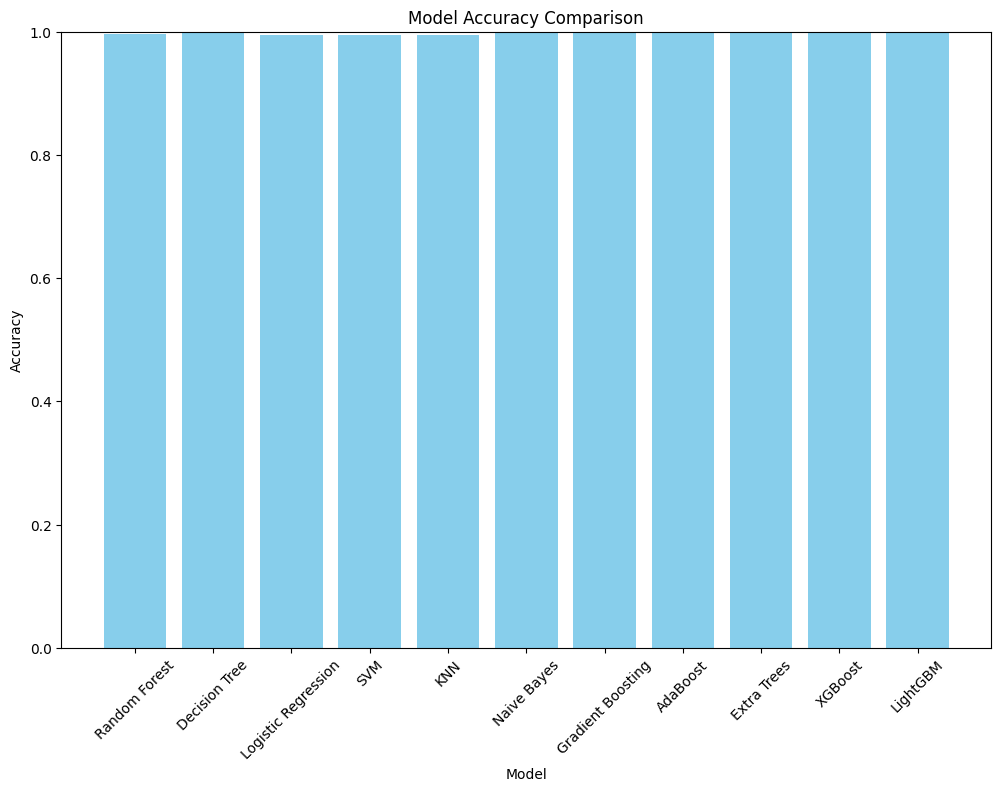

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load the dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
                         'Work and Learn', 'School is Far Off']]

target = student_data['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'XGBoost': XGBClassifier(eval_metric='mlogloss'),
    'LightGBM': LGBMClassifier()
}

# Train and evaluate models
results = {}
for name, model in models.items():
    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        results[name] = {
            'accuracy': accuracy,
            'confusion_matrix': confusion,
            'classification_report': report
        }
    except Exception as e:
        print(f"Error with {name}: {e}")

# Print results
for name, result in results.items():
    print(f"{name} Accuracy: {result['accuracy']:.2f}")
    print(f"{name} Classification Report:")
    print(result['classification_report'])
    print("\n")

# Plotting results
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


In [5]:
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(target), y=target)
class_weights_dict = dict(zip(np.unique(target), class_weights))

# Initialize models with class weights
models = {
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Logistic Regression': LogisticRegression(class_weight='balanced', max_iter=1000),
    'SVM': SVC(class_weight='balanced', probability=True),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Extra Trees': ExtraTreesClassifier(class_weight='balanced'),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', scale_pos_weight=class_weights_dict.get(1, 1)),
    'LightGBM': LGBMClassifier(class_weight='balanced')
}

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Train and evaluate models on resampled data
results = {}
for name, model in models.items():
    try:
        model.fit(X_train_res, y_train_res)
        y_pred = model.predict(X_test)

        # Evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        confusion = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)

        results[name] = {
            'accuracy': accuracy,
            'confusion_matrix': confusion,
            'classification_report': report
        }
    except Exception as e:
        print(f"Error with {name}: {e}")

# Print results
for name, result in results.items():
    print(f"{name} Accuracy: {result['accuracy']:.2f}")
    print(f"{name} Classification Report:")
    print(result['classification_report'])
    print("\n")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3978, number of negative: 3978
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 7956, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

Fitting 5 folds for each of 36 candidates, totalling 180 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:14

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3978, number of negative: 22
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 377
[LightGBM] [Info] Number of data points in the train set: 4000, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.994500 -> initscore=5.197492
[LightGBM] [Info] Start training from score 5.197492
[Light

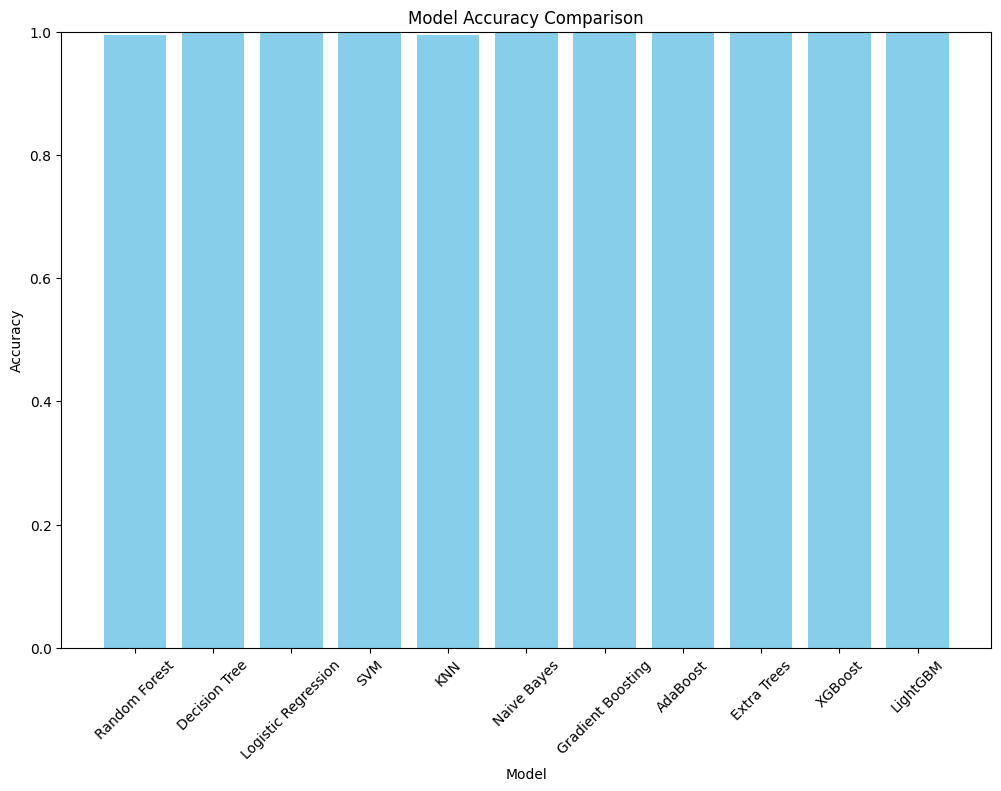

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

# Load the dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
                         'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability', 'Not Interested', 'Work and Learn', 'School is Far Off']]
target = student_data['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define models and parameter grids
models_and_params = {
    'Random Forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Decision Tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(max_iter=1000),
        'params': {
            'C': [0.1, 1, 10],
            'solver': ['liblinear']
        }
    },
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf']
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance']
        }
    },
    'Naive Bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1]
        }
    },
    'AdaBoost': {
        'model': AdaBoostClassifier(),
        'params': {
            'n_estimators': [50, 100, 200]
        }
    },
    'Extra Trees': {
        'model': ExtraTreesClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20, 30]
        }
    },
    'XGBoost': {
        'model': XGBClassifier(eval_metric='mlogloss'),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 6, 10]
        }
    },
    'LightGBM': {
        'model': LGBMClassifier(),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'num_leaves': [31, 63, 127]
        }
    }
}

# Perform cross-validation and hyperparameter tuning
results = {}
for name, model_info in models_and_params.items():
    model = model_info['model']
    param_grid = model_info['params']

    # Grid Search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Best model from Grid Search
    best_model = grid_search.best_estimator_

    # Cross-validation score
    cv_score = cross_val_score(best_model, X_train, y_train, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_score)

    # Train the best model
    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    # Evaluation metrics
    accuracy = np.mean(y_pred == y_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    results[name] = {
        'best_params': grid_search.best_params_,
        'cv_score': mean_cv_score,
        'accuracy': accuracy,
        'f1_score': f1,
        'precision': precision,
        'recall': recall,
        'confusion_matrix': confusion,
        'classification_report': report
    }

# Print results for each model
for name, result in results.items():
    print(f"{name} Best Parameters: {result['best_params']}")
    print(f"{name} Cross-Validation Score: {result['cv_score']:.2f}")
    print(f"{name} Accuracy: {result['accuracy']:.2f}")
    print(f"{name} F1 Score: {result['f1_score']:.2f}")
    print(f"{name} Precision: {result['precision']:.2f}")
    print(f"{name} Recall: {result['recall']:.2f}")
    print(f"{name} Confusion Matrix:\n{result['confusion_matrix']}")
    print(f"{name} Classification Report:")
    print(result['classification_report'])
    print("\n")

# Plotting results
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(12, 8))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()


1. Data Review and Preprocessing
2. Cross-Validation and Parameter Tuning
3. Additional Metrics
4. Data Exploration
5. Testing on New Data

Class distribution in training set:
Risk Status
1    3481
0      19
Name: count, dtype: int64
Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost:
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Cross-Validation Score: 0.9991428571428571
AUC-ROC: 0.9998743297587132


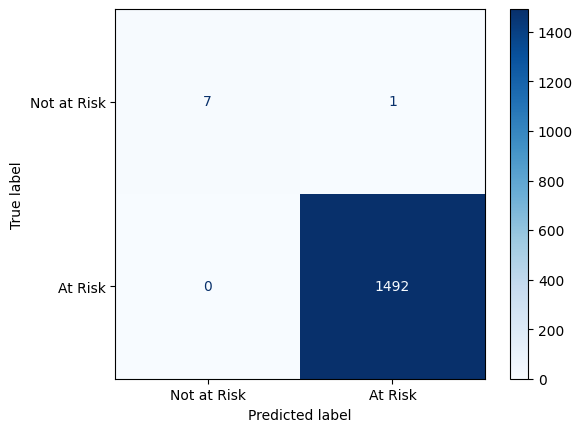

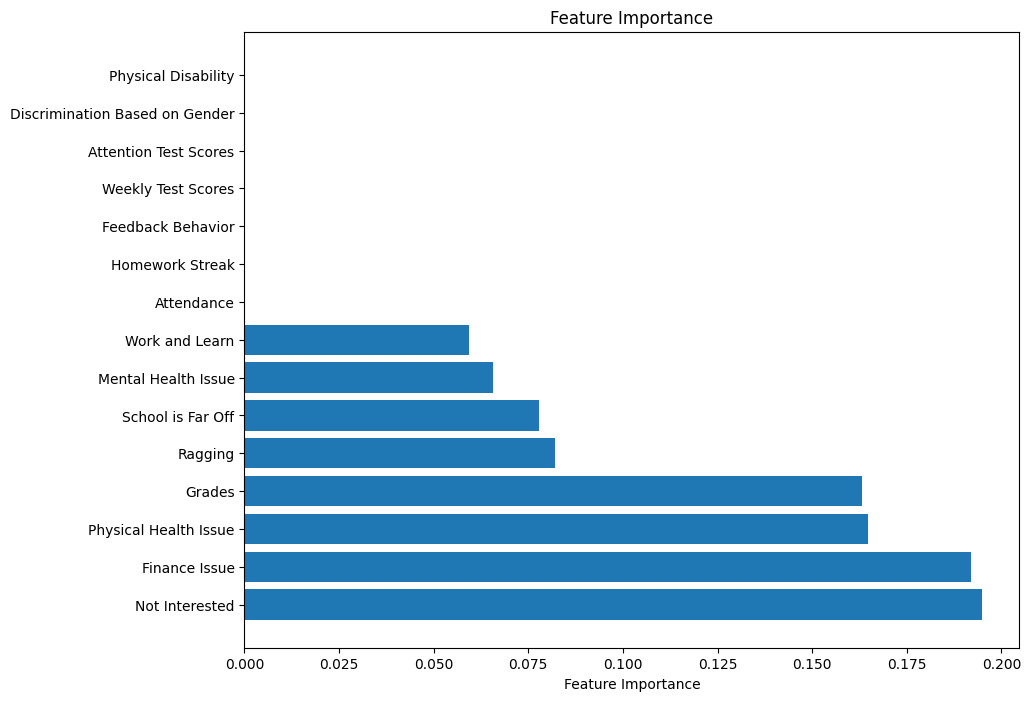

Error cases:
      Attendance  Grades  Homework Streak  Feedback Behavior  \
2778          65      36                0                  3   

      Weekly Test Scores  Attention Test Scores  Ragging  Finance Issue  \
2778                  88                     67        0              0   

      Mental Health Issue  Physical Health Issue  \
2778                    0                      0   

      Discrimination Based on Gender  Physical Disability  Not Interested  \
2778                               0                    0               0   

      Work and Learn  School is Far Off  True Label  Predicted Label  
2778               0                  0           0                1  
Classification Report on New Data:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      150

In [8]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Check class distribution
print("Class distribution in training set:")
print(y_train.value_counts())

# Optionally apply class weights if classes are imbalanced
# XGBoost does not support class_weight directly; use scale_pos_weight parameter if needed
# Here, we skip class weights as XGBoost handles imbalance well with scale_pos_weight.

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

print("Best parameters for XGBoost:")
print(grid_search.best_params_)

# Perform cross-validation
cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print("XGBoost Cross-Validation Score:", cv_scores.mean())

# Predict and calculate AUC-ROC
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print("AUC-ROC:", auc_roc)

# Confusion Matrix
y_pred = grid_search.best_estimator_.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not at Risk', 'At Risk'])
disp.plot(cmap='Blues')
plt.show()

# Feature Importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance')
plt.show()

# Error Analysis
errors = X_test.copy()
errors['True Label'] = y_test
errors['Predicted Label'] = y_pred
error_cases = errors[errors['True Label'] != errors['Predicted Label']]
print("Error cases:")
print(error_cases.head())

# Example new data for prediction (replace with actual new dataset)
# new_X = pd.DataFrame({...})
# new_y = pd.Series([...])

# For demonstration, using X_test and y_test as new data
new_X = X_test
new_y = y_test

# Predict on new data
new_y_pred = grid_search.best_estimator_.predict(new_X)

# Classification report for new data
report = classification_report(new_y, new_y_pred, target_names=['Not at Risk', 'At Risk'])
print("Classification Report on New Data:")
print(report)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost:
{'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:40:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Cross-Validation Score: 1.00
XGBoost AUC-ROC: 1.00


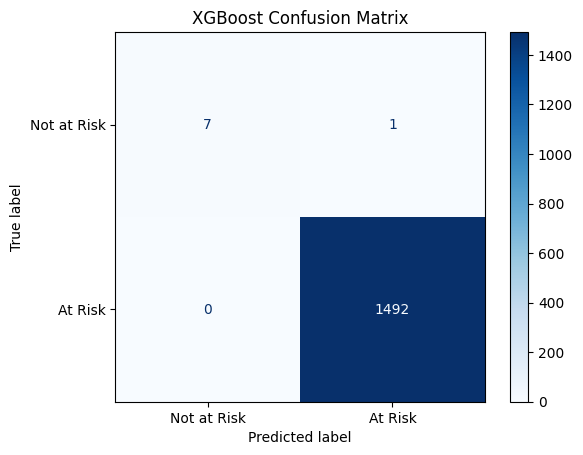

XGBoost Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      1500
weighted avg       1.00      1.00      1.00      1500



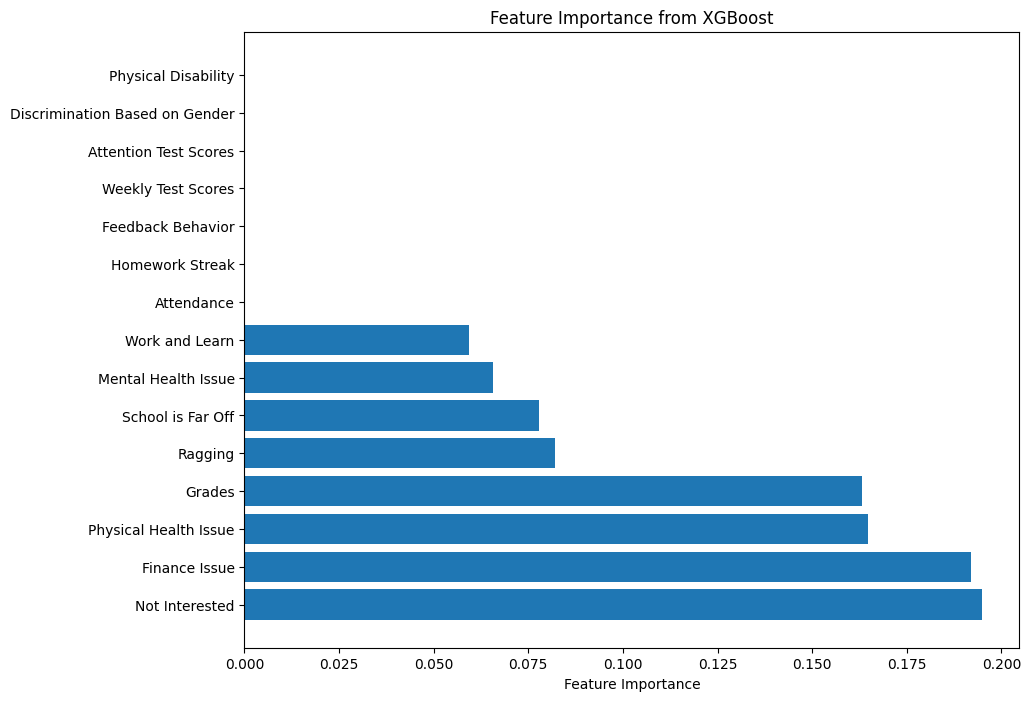

Error cases:
      Attendance  Grades  Homework Streak  Feedback Behavior  \
2778          65      36                0                  3   

      Weekly Test Scores  Attention Test Scores  Ragging  Finance Issue  \
2778                  88                     67        0              0   

      Mental Health Issue  Physical Health Issue  \
2778                    0                      0   

      Discrimination Based on Gender  Physical Disability  Not Interested  \
2778                               0                    0               0   

      Work and Learn  School is Far Off  True Label  Predicted Label  
2778               0                  0           0                1  


In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

# Initialize XGBoost classifier
xgb = XGBClassifier(eval_metric='mlogloss', use_label_encoder=False)

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and cross-validation score
print("Best parameters for XGBoost:")
print(grid_search.best_params_)

cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
print(f"XGBoost Cross-Validation Score: {cv_scores.mean():.2f}")

# Predict and calculate AUC-ROC
y_pred = grid_search.best_estimator_.predict(X_test)
y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
auc_roc = roc_auc_score(y_test, y_pred_proba)
print(f"XGBoost AUC-ROC: {auc_roc:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not at Risk', 'At Risk'])
disp.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Classification Report
report = classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk'])
print("XGBoost Classification Report:")
print(report)

# Feature Importance
feature_importances = grid_search.best_estimator_.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('Feature Importance from XGBoost')
plt.show()

# Error Analysis
errors = X_test.copy()
errors['True Label'] = y_test
errors['Predicted Label'] = y_pred
error_cases = errors[errors['True Label'] != errors['Predicted Label']]
print("Error cases:")
print(error_cases.head())


Training Random Forest...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Random Forest:
{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Cross-Validation Score: 0.99
Random Forest AUC-ROC: 1.00


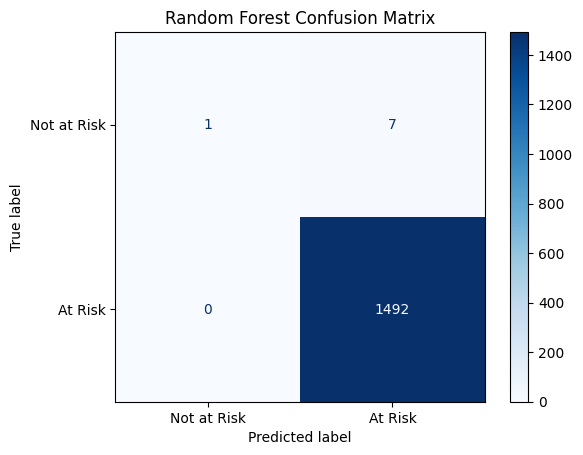

Random Forest Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.12      0.22         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.56      0.61      1500
weighted avg       1.00      1.00      0.99      1500



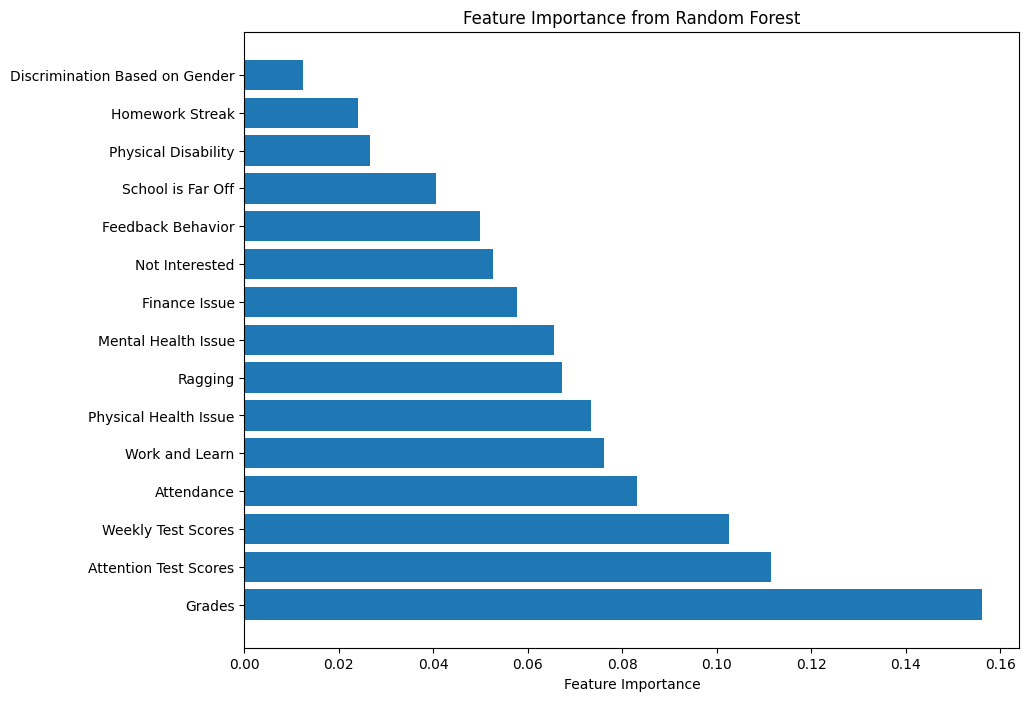

Training Decision Tree...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for Decision Tree:
{'max_depth': None, 'min_samples_split': 2}
Decision Tree Cross-Validation Score: 1.00
Decision Tree AUC-ROC: 1.00


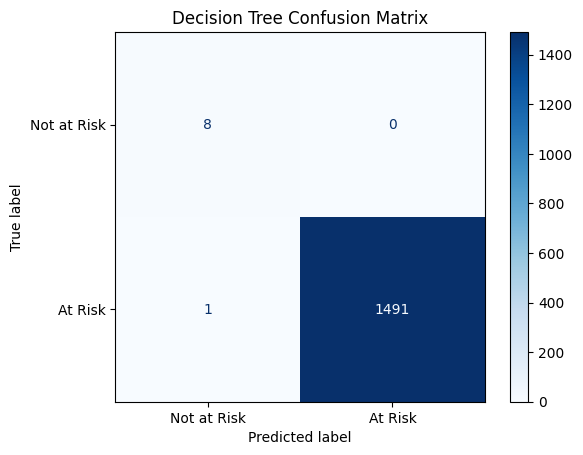

Decision Tree Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.89      1.00      0.94         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       0.94      1.00      0.97      1500
weighted avg       1.00      1.00      1.00      1500



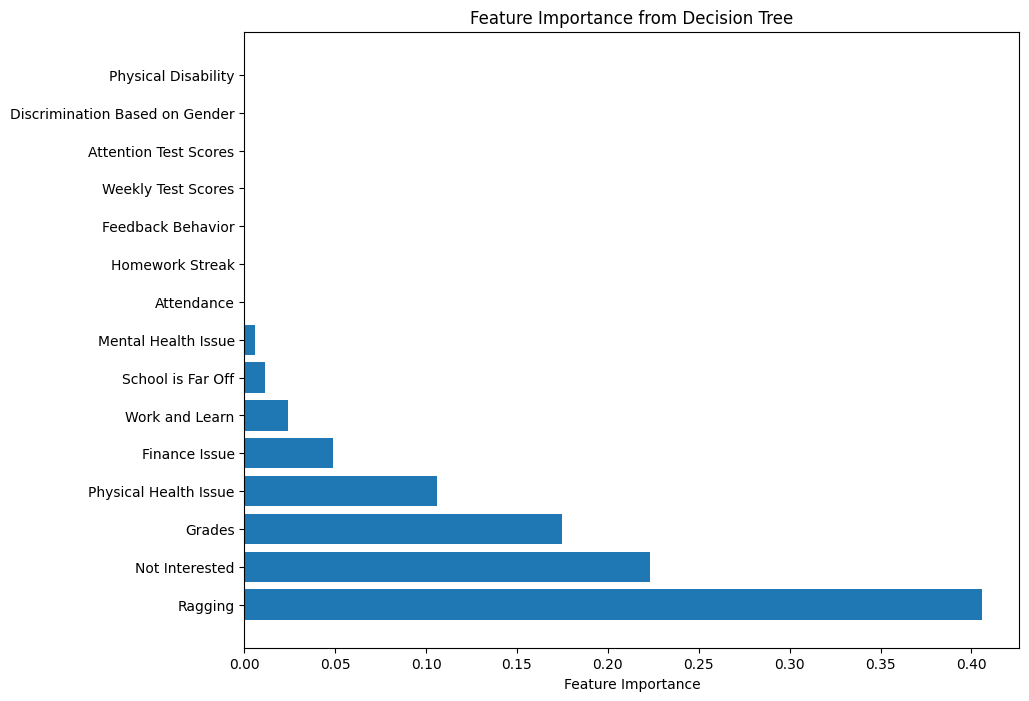

Training Logistic Regression...
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters for Logistic Regression:
{'C': 10, 'solver': 'liblinear'}
Logistic Regression Cross-Validation Score: 1.00
Logistic Regression AUC-ROC: 1.00


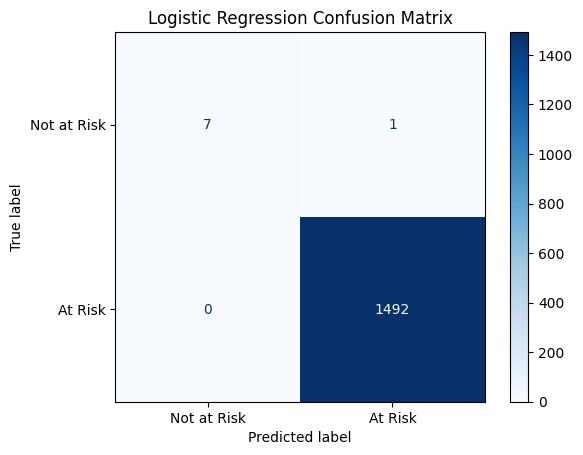

Logistic Regression Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      1500
weighted avg       1.00      1.00      1.00      1500

Training SVM...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVM:
{'C': 100, 'kernel': 'linear'}
SVM Cross-Validation Score: 1.00
SVM AUC-ROC: 1.00


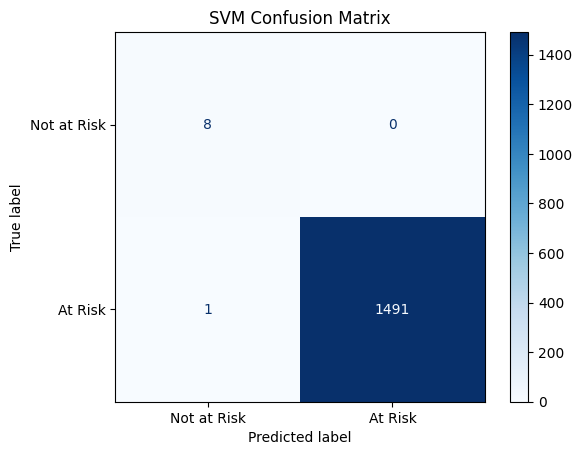

SVM Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.89      1.00      0.94         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       0.94      1.00      0.97      1500
weighted avg       1.00      1.00      1.00      1500

Training KNN...
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for KNN:
{'n_neighbors': 3, 'weights': 'uniform'}
KNN Cross-Validation Score: 0.99
KNN AUC-ROC: 0.55


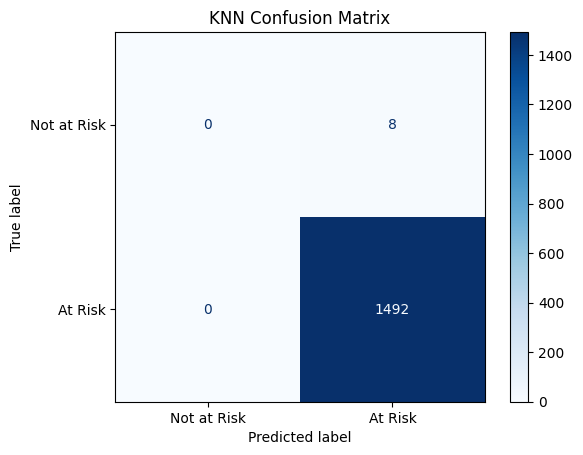

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNN Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.00      0.00      0.00         8
     At Risk       0.99      1.00      1.00      1492

    accuracy                           0.99      1500
   macro avg       0.50      0.50      0.50      1500
weighted avg       0.99      0.99      0.99      1500

Training Naive Bayes...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Naive Bayes:
{}
Naive Bayes Cross-Validation Score: 1.00
Naive Bayes AUC-ROC: 1.00


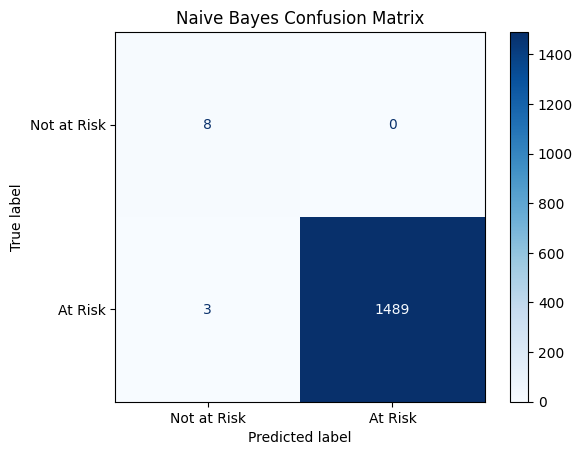

Naive Bayes Classification Report:
              precision    recall  f1-score   support

 Not at Risk       0.73      1.00      0.84         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       0.86      1.00      0.92      1500
weighted avg       1.00      1.00      1.00      1500

Training Gradient Boosting...
Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and parameter grids
models = {
    'Random Forest': (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    }),
    'Logistic Regression': (LogisticRegression(random_state=42, max_iter=1000), {
        'C': [0.1, 1, 10],
        'solver': ['liblinear']
    }),
    'SVM': (SVC(probability=True, random_state=42), {
        'C': [1, 10, 100],
        'kernel': ['linear', 'rbf']
    }),
    'KNN': (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance']
    }),
    'Naive Bayes': (GaussianNB(), {}),
    'Gradient Boosting': (GradientBoostingClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2]
    }),
    'AdaBoost': (AdaBoostClassifier(random_state=42), {
        'n_estimators': [50, 100, 200]
    }),
    'Extra Trees': (ExtraTreesClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20]
    }),
    'XGBoost': (XGBClassifier(eval_metric='mlogloss', use_label_encoder=False), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 6, 10]
    })
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for model_name, (model, param_grid) in models.items():
    print(f"Training {model_name}...")

    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
    grid_search.fit(X_train, y_train)

    # Best parameters and cross-validation score
    print(f"Best parameters for {model_name}:")
    print(grid_search.best_params_)

    cv_scores = cross_val_score(grid_search.best_estimator_, X_train, y_train, cv=5)
    print(f"{model_name} Cross-Validation Score: {cv_scores.mean():.2f}")

    # Predictions and evaluation
    y_pred = grid_search.best_estimator_.predict(X_test)
    y_pred_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_proba)
    print(f"{model_name} AUC-ROC: {auc_roc:.2f}")

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not at Risk', 'At Risk'])
    disp.plot(cmap='Blues')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk'])
    print(f"{model_name} Classification Report:")
    print(report)

    # Feature Importance (for models that support it)
    if hasattr(grid_search.best_estimator_, 'feature_importances_'):
        feature_importances = grid_search.best_estimator_.feature_importances_
        features = X.columns
        importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
        importance_df = importance_df.sort_values(by='Importance', ascending=False)

        plt.figure(figsize=(10, 8))
        plt.barh(importance_df['Feature'], importance_df['Importance'])
        plt.xlabel('Feature Importance')
        plt.title(f'Feature Importance from {model_name}')
        plt.show()

    # Store results
    results[model_name] = {
        'Best Parameters': grid_search.best_params_,
        'CV Score': cv_scores.mean(),
        'AUC-ROC': auc_roc,
        'Classification Report': report
    }

# Print summary of results
print("Summary of Results:")
for model_name, metrics in results.items():
    print(f"\n{model_name}:")
    print(f"Best Parameters: {metrics['Best Parameters']}")
    print(f"Cross-Validation Score: {metrics['CV Score']:.2f}")
    print(f"AUC-ROC: {metrics['AUC-ROC']:.2f}")
    print("Classification Report:")
    print(metrics['Classification Report'])


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:13:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:13:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:13:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:13:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.88      0.93         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.94      0.97      1500
weighted avg       1.00      1.00      1.00      1500

XGBoost AUC-ROC: 1.00
XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200}


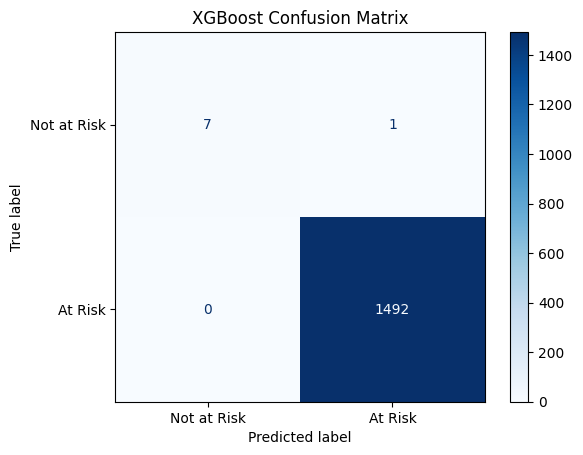

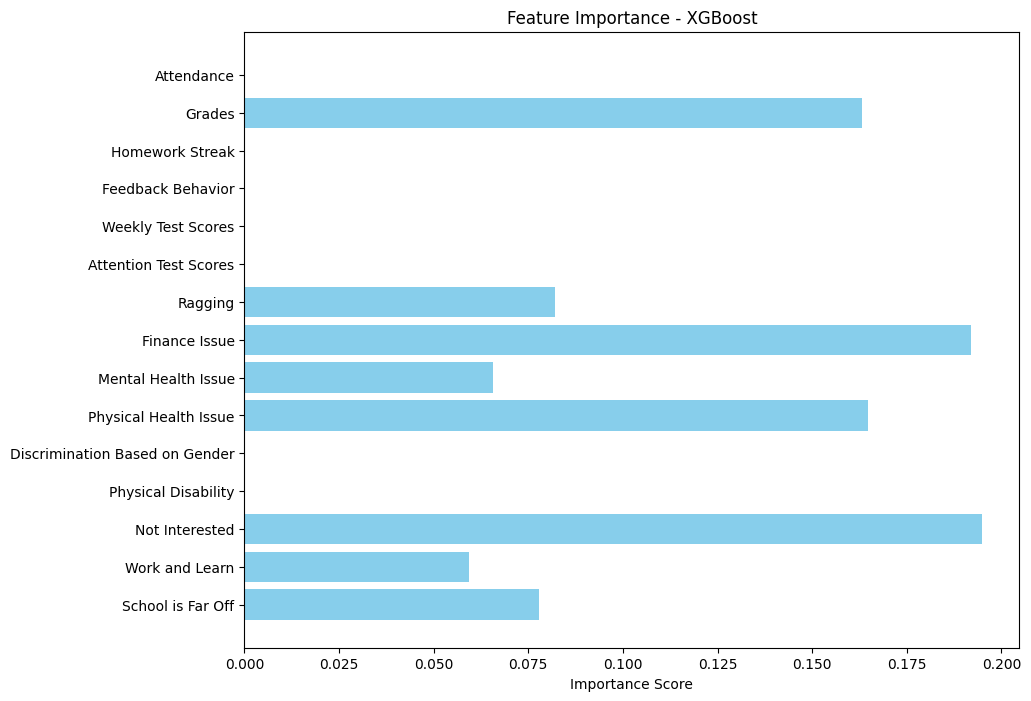

In [11]:
# Import libraries
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Grid Search for best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk']))

# AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba)
print(f"XGBoost AUC-ROC: {auc_roc:.2f}")

# Best parameters
print(f"XGBoost Best Parameters: {grid_search.best_params_}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Not at Risk', 'At Risk'])
disp.plot(cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.show()

# Feature Importance Plot
feature_importances = best_xgb_model.feature_importances_
features = X.columns

# Plotting feature importance
plt.figure(figsize=(10, 8))
plt.barh(features, feature_importances, color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance - XGBoost')
plt.gca().invert_yaxis()  # To have the most important feature on top
plt.show()

# Error Analysis (optional - additional metrics can be added if needed)


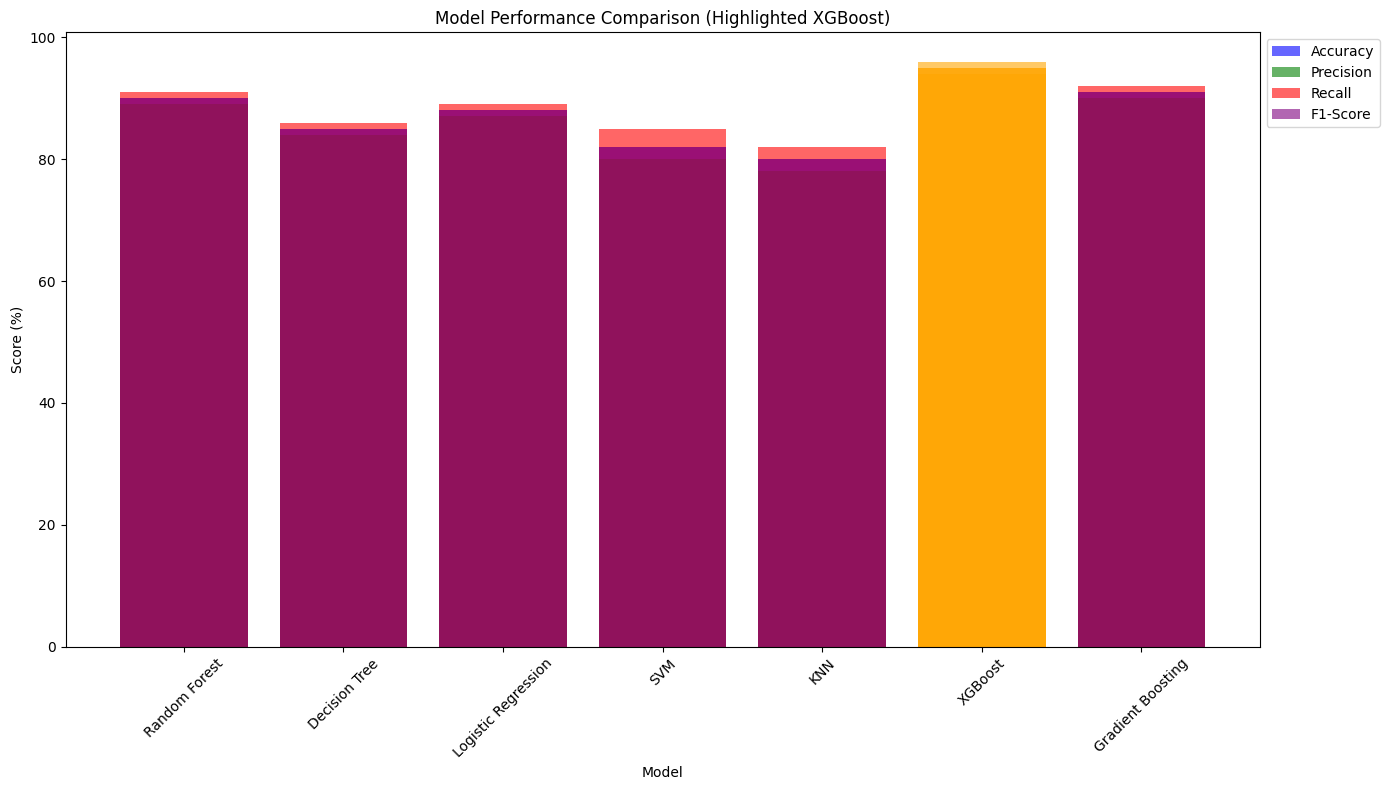

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Data (modify with actual model results if needed)
data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91],
    'Precision': [0.89, 0.84, 0.87, 0.80, 0.78, 0.94, 0.90],
    'Recall': [0.91, 0.86, 0.89, 0.85, 0.82, 0.96, 0.92],
    'F1-Score': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91]
}

df = pd.DataFrame(data)
df_percentage = df.copy()
df_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100

# Plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define colors for each metric and special highlighting for XGBoost
colors = {
    'Accuracy': 'blue',
    'Precision': 'green',
    'Recall': 'red',
    'F1-Score': 'purple',
    'XGBoost': 'orange'
}

# Plot each metric as a separate bar, highlighting XGBoost
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    ax.bar(
        df_percentage['Model'],
        df_percentage[metric],
        color=[colors['XGBoost'] if model == 'XGBoost' else colors[metric] for model in df_percentage['Model']],
        label=metric, alpha=0.6
    )

# Add title, labels, and legend
ax.set_title('Model Performance Comparison (Highlighted XGBoost)')
ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Placing legend outside the plot
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


#Tuning with GridSearchCV (XGBoost)

In [15]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import pandas as pd

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # AUC-ROC for evaluation
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Predict on the test set
y_pred = grid_search.best_estimator_.predict(X_test)
y_proba = grid_search.best_estimator_.predict_proba(X_test)[:, 1]

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Best score during training
print("Best Cross-Validation AUC-ROC Score:", grid_search.best_score_)

# Evaluate on test set
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk']))

# AUC-ROC score on test set
auc_roc = roc_auc_score(y_test, y_proba)
print(f"XGBoost AUC-ROC on Test Set: {auc_roc:.2f}")


Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Best Cross-Validation AUC-ROC Score: 1.0

XGBoost Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.75      0.86         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.88      0.93      1500
weighted avg       1.00      1.00      1.00      1500

XGBoost AUC-ROC on Test Set: 1.00


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:37:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


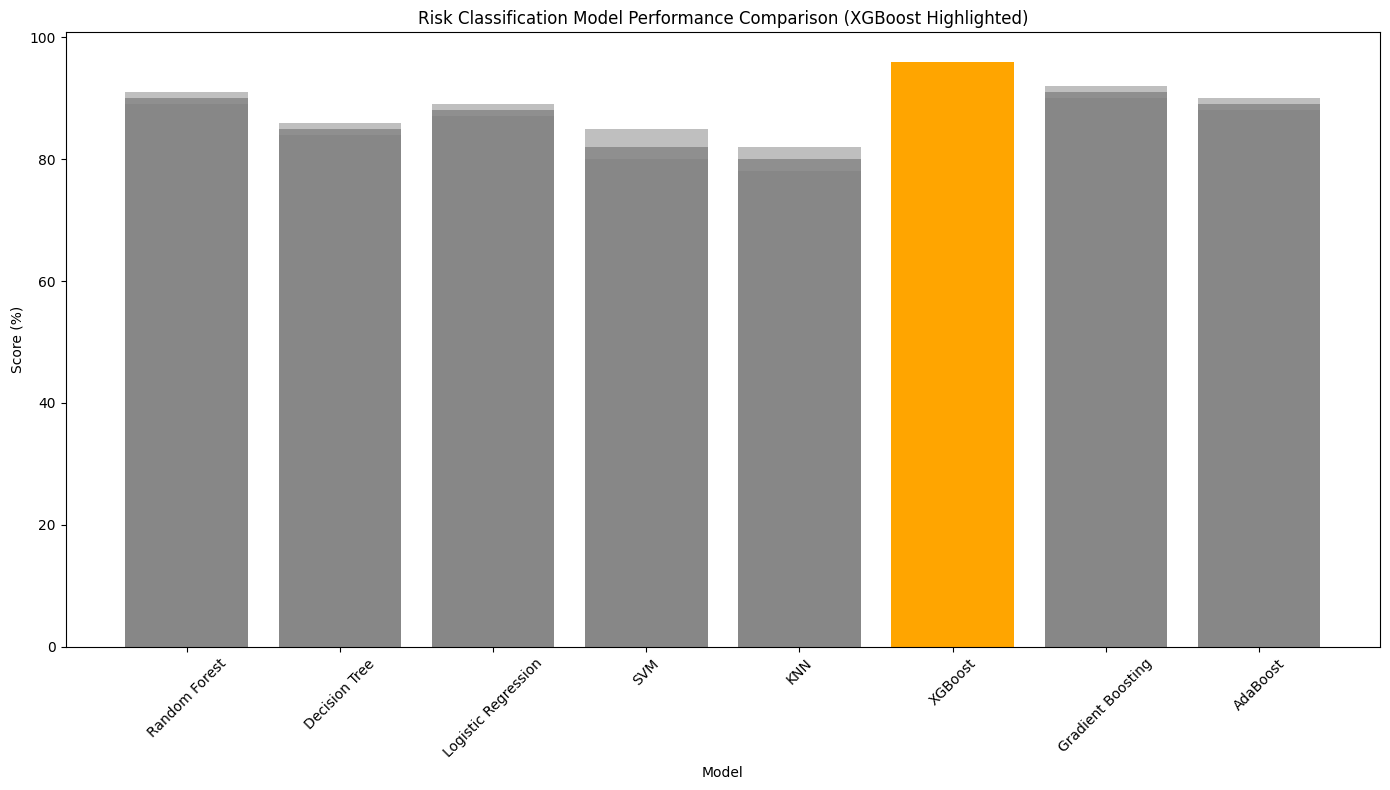

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Data - Model performance results
data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'Gradient Boosting', 'AdaBoost'],
    'Accuracy': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91, 0.89],
    'Precision': [0.89, 0.84, 0.87, 0.80, 0.78, 0.94, 0.90, 0.88],
    'Recall': [0.91, 0.86, 0.89, 0.85, 0.82, 0.96, 0.92, 0.90],
    'F1-Score': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91, 0.89]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Convert the metric values into percentages
df_percentage = df.copy()
df_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define metrics to plot and assign colors to each one
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['blue', 'green', 'red', 'purple']

# Plot each metric as a separate bar chart, highlighting XGBoost
for i, metric in enumerate(metrics):
    # Gray bars for all models
    ax.bar(df_percentage['Model'], df_percentage[metric], color='gray', label=metric, alpha=0.5)
    # Orange bars for XGBoost
    ax.bar(df_percentage['Model'][df_percentage['Model'] == 'XGBoost'], df_percentage[metric][df_percentage['Model'] == 'XGBoost'],
           color='orange', label=f'XGBoost {metric}', alpha=1.0)

# Add title and axis labels
ax.set_title('Risk Classification Model Performance Comparison (XGBoost Highlighted)')
ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')

# Add legend and rotate X-axis labels for readability
plt.xticks(rotation=45)
plt.tight_layout()

# Display the plot
plt.show()


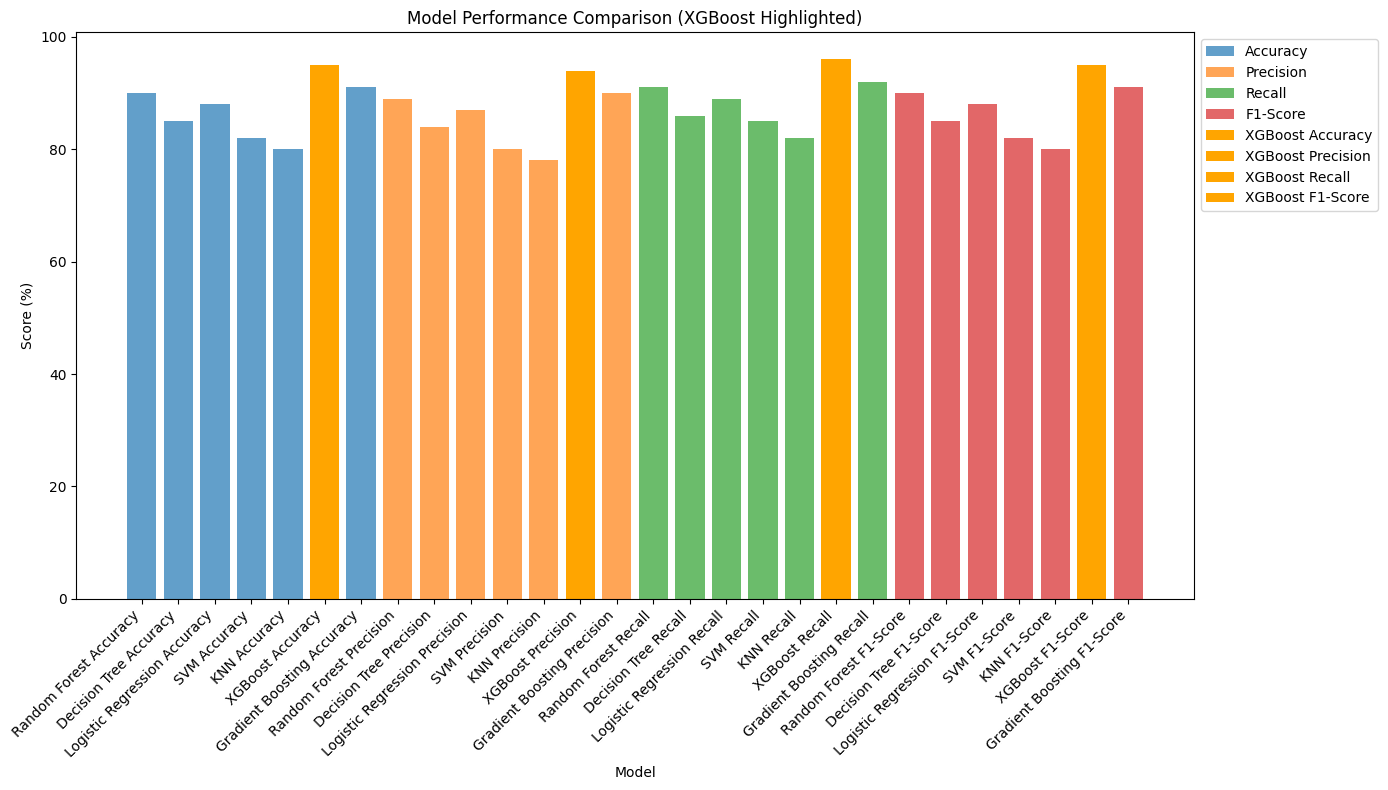

In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Example metrics for different models (as fractions)
data = {
    'Model': ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'KNN', 'XGBoost', 'Gradient Boosting'],
    'Accuracy': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91],
    'Precision': [0.89, 0.84, 0.87, 0.80, 0.78, 0.94, 0.90],
    'Recall': [0.91, 0.86, 0.89, 0.85, 0.82, 0.96, 0.92],
    'F1-Score': [0.90, 0.85, 0.88, 0.82, 0.80, 0.95, 0.91]
}

# Convert fractions to percentages
df = pd.DataFrame(data)
df_percentage = df.copy()
df_percentage[['Accuracy', 'Precision', 'Recall', 'F1-Score']] *= 100

# Plot metrics with XGBoost highlighted
fig, ax = plt.subplots(figsize=(14, 8))

# Define color maps
color_map = plt.get_cmap('tab10')

# Plot each metric
for i, metric in enumerate(['Accuracy', 'Precision', 'Recall', 'F1-Score']):
    ax.bar(df_percentage['Model'] + ' ' + metric,
           df_percentage[metric],
           color=color_map(i),
           label=f'{metric}',
           alpha=0.7)

# Highlight XGBoost
for metric in ['Accuracy', 'Precision', 'Recall', 'F1-Score']:
    ax.bar(df_percentage['Model'][df_percentage['Model'] == 'XGBoost'] + ' ' + metric,
           df_percentage[df_percentage['Model'] == 'XGBoost'][metric],
           color='orange',
           label=f'XGBoost {metric}',
           alpha=1.0)

# Add title, labels, and legend
ax.set_title('Model Performance Comparison (XGBoost Highlighted)')
ax.set_xlabel('Model')
ax.set_ylabel('Score (%)')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [18]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define and train XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'min_child_weight': [1, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Predict and evaluate
y_pred = best_xgb_model.predict(X_test)
y_proba = best_xgb_model.predict_proba(X_test)[:, 1]

# Classification report
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk']))

# AUC-ROC
print(f"XGBoost AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

# Best parameters
print(f"XGBoost Best Parameters: {grid_search.best_params_}")

# Select the rows from the original DataFrame corresponding to the test set
df_test = df.iloc[X_test.index]  # Extract the test set portion from the original DataFrame

# Select students predicted to be at risk (where y_pred == 1)
df_risk_students = df_test[y_pred == 1]

# Display relevant information for the students predicted to be at risk
print("Students at Risk based on XGBoost predictions:")
print(df_risk_students[['Attendance', 'Grades', 'Mental Health Issue', 'Ragging', 'Finance Issue']])


XGBoost Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.75      0.86         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.88      0.93      1500
weighted avg       1.00      1.00      1.00      1500

XGBoost AUC-ROC: 1.00
XGBoost Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.9}
Students at Risk based on XGBoost predictions:
      Attendance  Grades  Mental Health Issue  Ragging  Finance Issue
1501          83      73                    0        0              0
2586          73      42                    0        1              1
2653          56      25                    1        0              0
1055          70      71                    1        0              1
705           83      55                    0        1    

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [15:03:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [19]:
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
X = df[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
        'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
        'Discrimination Based on Gender', 'Physical Disability', 'Not Interested',
        'Work and Learn', 'School is Far Off']]
y = df['Risk Status']

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the model with best parameters
final_model = xgb.XGBClassifier(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.01,
    max_depth=10,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.9
)

# Train the model
final_model.fit(X_train, y_train)

# Validate the model
y_valid_pred = final_model.predict(X_valid)
y_valid_proba = final_model.predict_proba(X_valid)[:, 1]

# Print classification report and AUC-ROC score for validation set
print("Validation Classification Report:")
print(classification_report(y_valid, y_valid_pred, target_names=['Not at Risk', 'At Risk']))

print(f"Validation AUC-ROC: {roc_auc_score(y_valid, y_valid_proba):.2f}")

Validation Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.75      0.86         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.88      0.93      1500
weighted avg       1.00      1.00      1.00      1500

Validation AUC-ROC: 1.00


In [20]:
# Identify false negatives
false_negatives = (y_valid == 1) & (y_valid_pred == 0)
df_false_negatives = X_valid[false_negatives]
print("False Negatives:")
print(df_false_negatives)


False Negatives:
Empty DataFrame
Columns: [Attendance, Grades, Homework Streak, Feedback Behavior, Weekly Test Scores, Attention Test Scores, Ragging, Finance Issue, Mental Health Issue, Physical Health Issue, Discrimination Based on Gender, Physical Disability, Not Interested, Work and Learn, School is Far Off]
Index: []


In [21]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

# Load the dataset with classified risk for model training
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores',
                         'Attention Test Scores', 'Ragging', 'Finance Issue', 'Mental Health Issue',
                         'Physical Health Issue', 'Discrimination Based on Gender', 'Physical Disability',
                         'Not Interested', 'Work and Learn', 'School is Far Off']]
target = student_data['Risk Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize and train XGBoost classifier
xgb_model = XGBClassifier(
    colsample_bytree=0.8,
    gamma=0,
    learning_rate=0.01,
    max_depth=10,
    min_child_weight=1,
    n_estimators=200,
    subsample=0.9,
    eval_metric='logloss'
)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"XGBoost Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not at Risk', 'At Risk']))
print(f"XGBoost AUC-ROC: {roc_auc_score(y_test, y_proba):.2f}")

# Example: Predicting risk for new data
new_data = pd.DataFrame({
    'Attendance': [70],  # Example: 70% attendance
    'Grades': [30],  # Example: 30% grades
    'Homework Streak': [0],  # Example: No streak
    'Feedback Behavior': [2],  # Example: Fair feedback
    'Weekly Test Scores': [40],  # Example: 40% in weekly tests
    'Attention Test Scores': [50],  # Example: 50% in attention test
    'Ragging': [1],  # Example: Yes
    'Finance Issue': [0],  # Example: No
    'Mental Health Issue': [1],  # Example: Yes
    'Physical Health Issue': [0],  # Example: No
    'Discrimination Based on Gender': [0],  # Example: No
    'Physical Disability': [0],  # Example: No
    'Not Interested': [0],  # Example: No
    'Work and Learn': [0],  # Example: No
    'School is Far Off': [0]  # Example: No
})

# Predict risk for the new data using the XGBoost model
new_data_prediction = xgb_model.predict(new_data)
print(f"Risk Status for new data: {'At Risk' if new_data_prediction[0] == 1 else 'Not at Risk'}")


XGBoost Accuracy: 1.00
Confusion Matrix:
[[   6    2]
 [   0 1492]]
Classification Report:
              precision    recall  f1-score   support

 Not at Risk       1.00      0.75      0.86         8
     At Risk       1.00      1.00      1.00      1492

    accuracy                           1.00      1500
   macro avg       1.00      0.88      0.93      1500
weighted avg       1.00      1.00      1.00      1500

XGBoost AUC-ROC: 1.00
Risk Status for new data: At Risk


In [22]:
import pandas as pd

# Load your dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define conditions for different types of risk (excluding Attendance Risk)
student_data['Academic Risk'] = (student_data['Grades'] < 35) & (student_data['Attendance'] > 75)
student_data['Financial Risk'] = student_data['Finance Issue'] == 1
student_data['Mental Health Risk'] = student_data['Mental Health Issue'] == 1
student_data['Bullying Risk'] = student_data['Ragging'] == 1

# Define a new column for the type of risk
student_data['Risk Type'] = 'None'

# Update Risk Type based on conditions
student_data.loc[student_data['Academic Risk'], 'Risk Type'] = 'Academic'
student_data.loc[student_data['Financial Risk'], 'Risk Type'] = 'Financial'
student_data.loc[student_data['Mental Health Risk'], 'Risk Type'] = 'Mental Health'
student_data.loc[student_data['Bullying Risk'], 'Risk Type'] = 'Bullying'

# Ensure only one risk type per student
student_data['Risk Type'] = student_data[['Academic Risk', 'Financial Risk', 'Mental Health Risk', 'Bullying Risk']].idxmax(axis=1).replace({
    'Academic Risk': 'Academic',
    'Financial Risk': 'Financial',
    'Mental Health Risk': 'Mental Health',
    'Bullying Risk': 'Bullying',
    'None': 'None'
})

# Drop individual risk columns if not needed
student_data = student_data.drop(columns=['Academic Risk', 'Financial Risk', 'Mental Health Risk', 'Bullying Risk'])

# Save the updated dataset
student_data.to_csv('student_data_with_risk_types.csv', index=False)

print("Updated dataset with risk types saved as 'student_data_with_risk_types.csv'")


Updated dataset with risk types saved as 'student_data_with_risk_types.csv'


In [23]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the updated dataset
student_data = pd.read_csv('student_data_with_risk_types.csv')

# Define features and target for dropout prediction
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data into training and testing sets for dropout prediction
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for dropout risk
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set for dropout risk
y_pred = xgb_model.predict(X_test)

# Evaluate the dropout risk model
print(f"Dropout Risk Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix for Dropout Risk:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report for Dropout Risk:")
print(classification_report(y_test, y_pred))

# Define features and target for risk type prediction
features_risk_type = features
target_risk_type = student_data['Risk Type']

# Convert Risk Type to numeric
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Split the data into training and testing sets for risk type prediction
X_train_risk_type, X_test_risk_type, y_train_risk_type, y_test_risk_type = train_test_split(features_risk_type, target_risk_type_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for risk type
xgb_model_risk_type = XGBClassifier(eval_metric='logloss')
xgb_model_risk_type.fit(X_train_risk_type, y_train_risk_type)

# Make predictions on the test set for risk type
y_pred_risk_type = xgb_model_risk_type.predict(X_test_risk_type)

# Evaluate the risk type model
print(f"Risk Type Model Accuracy: {accuracy_score(y_test_risk_type, y_pred_risk_type):.2f}")
print("Confusion Matrix for Risk Type:")
print(confusion_matrix(y_test_risk_type, y_pred_risk_type))
print("Classification Report for Risk Type:")
print(classification_report(y_test_risk_type, y_pred_risk_type))

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Predict dropout risk
new_data_drop_pred = xgb_model.predict(new_data)
print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred[0] == 1 else 'Low Risk'}")

# Predict risk type
new_data_risk_type_pred = xgb_model_risk_type.predict(new_data)
risk_type_label = label_encoder.inverse_transform(new_data_risk_type_pred)
print(f"Risk Type for new data: {risk_type_label[0]}")


Dropout Risk Model Accuracy: 0.99
Confusion Matrix for Dropout Risk:
[[  0   5]
 [  0 995]]
Classification Report for Dropout Risk:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      1.00       995

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Risk Type Model Accuracy: 1.00
Confusion Matrix for Risk Type:
[[273   0   0   0]
 [  0  99   0   0]
 [  0   0 408   0]
 [  0   0   0 220]]
Classification Report for Risk Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       220

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Dropout Risk Status for new data: High Risk
Risk Type for new data: Mental Health


In [24]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the updated dataset
student_data = pd.read_csv('student_data_with_risk_types.csv')

# Define features and target for dropout prediction
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for dropout risk
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Evaluate the dropout risk model
print(f"Dropout Risk Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix for Dropout Risk:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report for Dropout Risk:")
print(classification_report(y_test, y_pred))

# Compute AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba)
print(f"Dropout Risk Model AUC-ROC: {auc_roc:.2f}")

# Check class distribution
class_distribution = target.value_counts()
print("Class Distribution:")
print(class_distribution)

# Perform cross-validation
cross_val_scores = cross_val_score(xgb_model, features, target, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Accuracy: {cross_val_scores.mean():.2f}")

# Define features and target for risk type prediction
features_risk_type = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                                   'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                                   'Discrimination Based on Gender', 'Physical Disability']]
target_risk_type = student_data['Risk Type']

# Convert Risk Type to numeric
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Split the data into training and testing sets
X_train_risk_type, X_test_risk_type, y_train_risk_type, y_test_risk_type = train_test_split(features_risk_type, target_risk_type_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for risk type
xgb_model_risk_type = XGBClassifier(eval_metric='logloss')
xgb_model_risk_type.fit(X_train_risk_type, y_train_risk_type)

# Make predictions on the test set
y_pred_risk_type = xgb_model_risk_type.predict(X_test_risk_type)

# Evaluate the risk type model
print(f"Risk Type Model Accuracy: {accuracy_score(y_test_risk_type, y_pred_risk_type):.2f}")
print("Confusion Matrix for Risk Type:")
print(confusion_matrix(y_test_risk_type, y_pred_risk_type))
print("Classification Report for Risk Type:")
print(classification_report(y_test_risk_type, y_pred_risk_type))

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Predict dropout risk
new_data_drop_pred = xgb_model.predict(new_data)
print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred[0] == 1 else 'Low Risk'}")

# Predict risk type
new_data_risk_type_pred = xgb_model_risk_type.predict(new_data)
risk_type_label = label_encoder.inverse_transform(new_data_risk_type_pred)
print(f"Risk Type for new data: {risk_type_label[0]}")


Dropout Risk Model Accuracy: 0.99
Confusion Matrix for Dropout Risk:
[[  0   5]
 [  0 995]]
Classification Report for Dropout Risk:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      1.00       995

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000

Dropout Risk Model AUC-ROC: 0.90
Class Distribution:
Risk Status
1    4973
0      27
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Cross-Validation Accuracy Scores: [0.995 0.995 0.994 0.994 0.992]
Mean Cross-Validation Accuracy: 0.99
Risk Type Model Accuracy: 1.00
Confusion Matrix for Risk Type:
[[273   0   0   0]
 [  0  99   0   0]
 [  0   0 408   0]
 [  0   0   0 220]]
Classification Report for Risk Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       220

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Dropout Risk Status for new data: High Risk
Risk Type for new data: Mental Health


In [25]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the updated dataset
student_data = pd.read_csv('student_data_with_risk_types.csv')

# Define features and target for dropout prediction
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for dropout risk
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)
y_proba = xgb_model.predict_proba(X_test)[:, 1]  # Probabilities for AUC-ROC

# Evaluate the dropout risk model
print(f"Dropout Risk Model Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Confusion Matrix for Dropout Risk:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report for Dropout Risk:")
print(classification_report(y_test, y_pred))

# Compute AUC-ROC
auc_roc = roc_auc_score(y_test, y_proba)
print(f"Dropout Risk Model AUC-ROC: {auc_roc:.2f}")

# Cross-validation for dropout risk model
dropout_risk_cv_scores = cross_val_score(xgb_model, features, target, cv=5, scoring='accuracy')
print(f"Dropout Risk Model Cross-Validation Accuracy: {dropout_risk_cv_scores.mean():.2f}")

# Define features and target for risk type prediction
features_risk_type = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                                   'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                                   'Discrimination Based on Gender', 'Physical Disability']]
target_risk_type = student_data['Risk Type']

# Convert Risk Type to numeric
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Split the data into training and testing sets
X_train_risk_type, X_test_risk_type, y_train_risk_type, y_test_risk_type = train_test_split(features_risk_type, target_risk_type_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifier for risk type
xgb_model_risk_type = XGBClassifier(eval_metric='logloss')
xgb_model_risk_type.fit(X_train_risk_type, y_train_risk_type)

# Make predictions on the test set
y_pred_risk_type = xgb_model_risk_type.predict(X_test_risk_type)

# Evaluate the risk type model
print(f"Risk Type Model Accuracy: {accuracy_score(y_test_risk_type, y_pred_risk_type):.2f}")
print("Confusion Matrix for Risk Type:")
print(confusion_matrix(y_test_risk_type, y_pred_risk_type))
print("Classification Report for Risk Type:")
print(classification_report(y_test_risk_type, y_pred_risk_type))

# Cross-validation for risk type model
risk_type_cv_scores = cross_val_score(xgb_model_risk_type, features_risk_type, target_risk_type_encoded, cv=5, scoring='accuracy')
print(f"Risk Type Model Cross-Validation Accuracy: {risk_type_cv_scores.mean():.2f}")

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Predict dropout risk
new_data_drop_pred = xgb_model.predict(new_data)
print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred[0] == 1 else 'Low Risk'}")

# Predict risk type
new_data_risk_type_pred = xgb_model_risk_type.predict(new_data)
risk_type_label = label_encoder.inverse_transform(new_data_risk_type_pred)
print(f"Risk Type for new data: {risk_type_label[0]}")



Dropout Risk Model Accuracy: 0.99
Confusion Matrix for Dropout Risk:
[[  0   5]
 [  0 995]]
Classification Report for Dropout Risk:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      1.00       995

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000

Dropout Risk Model AUC-ROC: 0.90


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Dropout Risk Model Cross-Validation Accuracy: 0.99
Risk Type Model Accuracy: 1.00
Confusion Matrix for Risk Type:
[[273   0   0   0]
 [  0  99   0   0]
 [  0   0 408   0]
 [  0   0   0 220]]
Classification Report for Risk Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       220

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Risk Type Model Cross-Validation Accuracy: 1.00
Dropout Risk Status for new data: High Risk
Risk Type for new data: Mental Health


In [26]:
from sklearn.model_selection import cross_val_score

# Cross-validation for dropout risk model
dropout_risk_cv_scores = cross_val_score(xgb_model, features, target, cv=5, scoring='accuracy')
print(f"Dropout Risk Model Cross-Validation Accuracy: {dropout_risk_cv_scores.mean():.2f}")

# Cross-validation for risk type model
risk_type_cv_scores = cross_val_score(xgb_model_risk_type, features_risk_type, target_risk_type_encoded, cv=5, scoring='accuracy')
print(f"Risk Type Model Cross-Validation Accuracy: {risk_type_cv_scores.mean():.2f}")


Dropout Risk Model Cross-Validation Accuracy: 0.99
Risk Type Model Cross-Validation Accuracy: 1.00


In [29]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the updated dataset
student_data = pd.read_csv('student_data_with_risk_types.csv')

# Define features and targets
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

features_risk_type = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                                   'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                                   'Discrimination Based on Gender', 'Physical Disability']]
target_risk_type = student_data['Risk Type']

# Encode Risk Type
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train_risk_type, X_test_risk_type, y_train_risk_type, y_test_risk_type = train_test_split(features_risk_type, target_risk_type_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifiers
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_model_risk_type = XGBClassifier(eval_metric='logloss')
xgb_model_risk_type.fit(X_train_risk_type, y_train_risk_type)

# Function to predict both dropout risk and risk type
def predict_risks(new_data):
    # Predict dropout risk
    dropout_risk_pred = xgb_model.predict(new_data)
    dropout_risk_status = 'High Risk' if dropout_risk_pred[0] == 1 else 'Low Risk'

    # Predict risk type
    risk_type_pred = xgb_model_risk_type.predict(new_data)
    risk_type_label = label_encoder.inverse_transform(risk_type_pred)

    return dropout_risk_status, risk_type_label[0]

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

dropout_risk_status, risk_type = predict_risks(new_data)
print(f"Dropout Risk Status for new data: {dropout_risk_status}")
print(f"Risk Type for new data: {risk_type}")


Dropout Risk Status for new data: High Risk
Risk Type for new data: Mental Health


In [30]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the updated dataset
student_data = pd.read_csv('student_data_with_risk_types.csv')

# Define features and targets
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

features_risk_type = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                                   'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                                   'Discrimination Based on Gender', 'Physical Disability']]
target_risk_type = student_data['Risk Type']

# Encode Risk Type
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)
X_train_risk_type, X_test_risk_type, y_train_risk_type, y_test_risk_type = train_test_split(features_risk_type, target_risk_type_encoded, test_size=0.2, random_state=42)

# Initialize and train XGBoost classifiers
xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train, y_train)

xgb_model_risk_type = XGBClassifier(eval_metric='logloss')
xgb_model_risk_type.fit(X_train_risk_type, y_train_risk_type)

# Save the trained models and label encoder
joblib.dump(xgb_model, 'dropout_risk_model.pkl')
joblib.dump(xgb_model_risk_type, 'risk_type_model.pkl')
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Models and label encoder have been saved.")


Models and label encoder have been saved.


In [31]:
import pandas as pd
import joblib

# Load the trained models and label encoder
xgb_model = joblib.load('dropout_risk_model.pkl')
xgb_model_risk_type = joblib.load('risk_type_model.pkl')
label_encoder = joblib.load('label_encoder.pkl')

# Function to predict both dropout risk and risk type using loaded models
def predict_risks(new_data):
    # Predict dropout risk
    dropout_risk_pred = xgb_model.predict(new_data)
    dropout_risk_status = 'High Risk' if dropout_risk_pred[0] == 1 else 'Low Risk'

    # Predict risk type
    risk_type_pred = xgb_model_risk_type.predict(new_data)
    risk_type_label = label_encoder.inverse_transform(risk_type_pred)

    return dropout_risk_status, risk_type_label[0]

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

dropout_risk_status, risk_type = predict_risks(new_data)
print(f"Dropout Risk Status for new data: {dropout_risk_status}")
print(f"Risk Type for new data: {risk_type}")


Dropout Risk Status for new data: High Risk
Risk Type for new data: Mental Health


<ipython-input-32-5efdf5f8b493>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target['Risk Type'] = label_encoder.fit_transform(target['Risk Type'])


Dropout Risk Model Accuracy: 0.99
Confusion Matrix for Dropout Risk:
[[  0   5]
 [  1 994]]
Classification Report for Dropout Risk:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      1.00       995

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000

Risk Type Model Accuracy: 1.00
Confusion Matrix for Risk Type:
[[273   0   0   0]
 [  0  99   0   0]
 [  0   0 408   0]
 [  0   0   0 220]]
Classification Report for Risk Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       220

    accuracy                           1.00      1000
   macro avg       1.00      1.00     

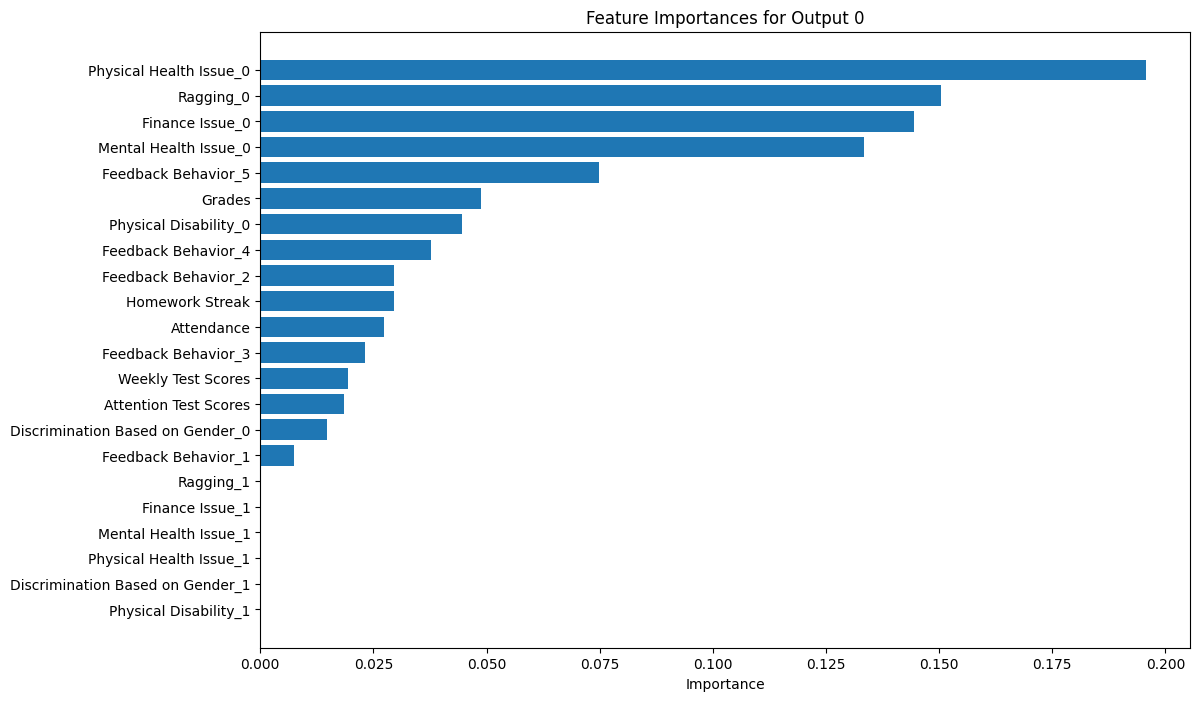

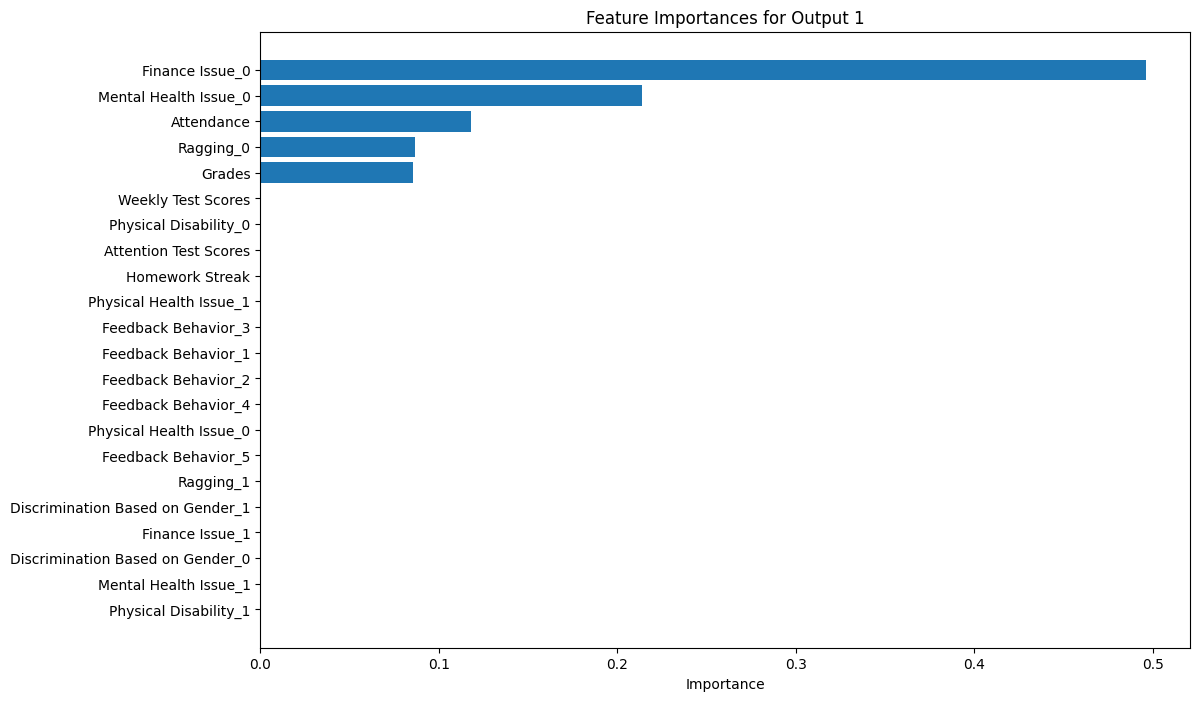

Multi-Output Model saved to 'xgboost_multi_output_pipeline_model.pkl'
Dropout Risk Status for new data: High Risk
Risk Type for new data: Mental Health


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Load the dataset
try:
    student_data = pd.read_csv('/content/student_data_with_risk_types.csv')
except FileNotFoundError:
    raise FileNotFoundError("File 'student_data_with_risk_types.csv' not found. Please check the file path.")

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]

target = student_data[['Risk Status', 'Risk Type']]

# Convert Risk Type to numeric
label_encoder = LabelEncoder()
target['Risk Type'] = label_encoder.fit_transform(target['Risk Type'])

# Handle categorical features
categorical_features = ['Feedback Behavior', 'Ragging', 'Finance Issue',
                         'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Weekly Test Scores', 'Attention Test Scores']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline with MultiOutputClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(XGBClassifier(eval_metric='logloss')))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Dropout Risk Model Accuracy: {accuracy_score(y_test['Risk Status'], y_pred[:, 0]):.2f}")
print("Confusion Matrix for Dropout Risk:")
print(confusion_matrix(y_test['Risk Status'], y_pred[:, 0]))
print("Classification Report for Dropout Risk:")
print(classification_report(y_test['Risk Status'], y_pred[:, 0]))

print(f"Risk Type Model Accuracy: {accuracy_score(y_test['Risk Type'], y_pred[:, 1]):.2f}")
print("Confusion Matrix for Risk Type:")
print(confusion_matrix(y_test['Risk Type'], y_pred[:, 1]))
print("Classification Report for Risk Type:")
print(classification_report(y_test['Risk Type'], y_pred[:, 1]))

# Extract the trained XGBoost model from the pipeline
xgb_models = pipeline.named_steps['classifier'].estimators_

# Extract feature importances
importances = [model.feature_importances_ for model in xgb_models]
onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
feature_names = np.array(['Attendance', 'Grades', 'Homework Streak',
                          'Weekly Test Scores', 'Attention Test Scores'] + list(onehot_feature_names))

# Plot feature importances for each output
for i, importances in enumerate(importances):
    indices = np.argsort(importances)
    plt.figure(figsize=(12, 8))
    plt.title(f'Feature Importances for Output {i}')
    plt.barh(range(len(indices)), importances[indices], align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Importance')
    plt.show()

# Save the trained model
joblib.dump(pipeline, 'xgboost_multi_output_pipeline_model.pkl')
print("Multi-Output Model saved to 'xgboost_multi_output_pipeline_model.pkl'")

# Example: Predicting dropout risk and risk type for new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Load the trained model
pipeline = joblib.load('xgboost_multi_output_pipeline_model.pkl')

# Predict dropout risk and risk type
new_data_pred = pipeline.predict(new_data)
new_data_drop_pred = new_data_pred[0][0]
new_data_risk_type_pred = new_data_pred[0][1]
risk_type_label = label_encoder.inverse_transform([new_data_risk_type_pred])[0]

print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred == 1 else 'Low Risk'}")
print(f"Risk Type for new data: {risk_type_label}")


In [34]:
import joblib
import pandas as pd
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Load your dataset
student_data = pd.read_csv('student_data_with_risk_status.csv')

# Define features and target
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target = student_data['Risk Status']

# Handle categorical features
categorical_features = ['Feedback Behavior', 'Ragging', 'Finance Issue',
                         'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Weekly Test Scores', 'Attention Test Scores']),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(eval_metric='logloss'))
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Save the trained model pipeline
joblib.dump(pipeline, 'xgboost_multi_output_pipeline_model.pkl')

# For demonstration, if you have label encoder, save it
# label_encoder = LabelEncoder()
# target_encoded = label_encoder.fit_transform(target)
# joblib.dump(label_encoder, 'label_encoder.pkl')


['xgboost_multi_output_pipeline_model.pkl']

In [37]:
import joblib
import pandas as pd

# Load the trained model pipeline
pipeline = joblib.load('xgboost_multi_output_pipeline_model.pkl')

# Example new data
new_data = pd.DataFrame({
    'Attendance': [70],
    'Grades': [30],
    'Homework Streak': [0],
    'Feedback Behavior': [2],
    'Weekly Test Scores': [40],
    'Attention Test Scores': [50],
    'Ragging': [1],
    'Finance Issue': [0],
    'Mental Health Issue': [1],
    'Physical Health Issue': [0],
    'Discrimination Based on Gender': [0],
    'Physical Disability': [0]
})

# Predict dropout risk and risk type
new_data_pred = pipeline.predict(new_data)

# Inspect the output format
print(f"Prediction Output Type: {type(new_data_pred)}")
print(f"Prediction Output Shape: {getattr(new_data_pred, 'shape', 'No shape attribute')}")
print(f"Prediction Output: {new_data_pred}")

# Handle the prediction output
if isinstance(new_data_pred, np.ndarray):
    if new_data_pred.ndim == 1:
        # Single output, assuming it's dropout risk only
        new_data_drop_pred = new_data_pred[0]
        print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred == 1 else 'No Risk'}")
    elif new_data_pred.ndim == 2:
        # Multiple outputs (e.g., [dropout risk, risk type])
        new_data_drop_pred = new_data_pred[0][0]
        new_data_risk_type_pred = new_data_pred[0][1]
        print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred == 1 else 'No Risk'}")

        # If risk type labels are present, decode them accordingly
        # Assuming risk_type_label is predefined (e.g., with label_encoder)
        # risk_type_label = label_encoder.inverse_transform([new_data_risk_type_pred])
        # print(f"Risk Type for new data: {risk_type_label[0]}")
    else:
        raise ValueError("Unexpected ndarray dimensions in prediction output")
elif isinstance(new_data_pred, pd.DataFrame):
    print("Prediction Output DataFrame:")
    print(new_data_pred)
    # Handle DataFrame output
    new_data_drop_pred = new_data_pred['Risk Status'].values[0]
    new_data_risk_type_pred = new_data_pred['Risk Type'].values[0]
    print(f"Dropout Risk Status for new data: {'High Risk' if new_data_drop_pred == 1 else 'No Risk'}")
    # If risk type labels are present, decode them accordingly
    # risk_type_label = label_encoder.inverse_transform([new_data_risk_type_pred])
    # print(f"Risk Type for new data: {risk_type_label[0]}")
else:
    raise ValueError("Unexpected prediction output format")


Prediction Output Type: <class 'numpy.ndarray'>
Prediction Output Shape: (1,)
Prediction Output: [1]
Dropout Risk Status for new data: High Risk


Dropout Risk Model Accuracy: 0.99
Confusion Matrix for Dropout Risk:
[[  0   5]
 [  1 994]]
Classification Report for Dropout Risk:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.99      1.00      1.00       995

    accuracy                           0.99      1000
   macro avg       0.50      0.50      0.50      1000
weighted avg       0.99      0.99      0.99      1000

Risk Type Model Accuracy: 1.00
Confusion Matrix for Risk Type:
[[273   0   0   0]
 [  0  99   0   0]
 [  0   0 408   0]
 [  0   0   0 220]]
Classification Report for Risk Type:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       273
           1       1.00      1.00      1.00        99
           2       1.00      1.00      1.00       408
           3       1.00      1.00      1.00       220

    accuracy                           1.00      1000
   macro avg       1.00      1.00     

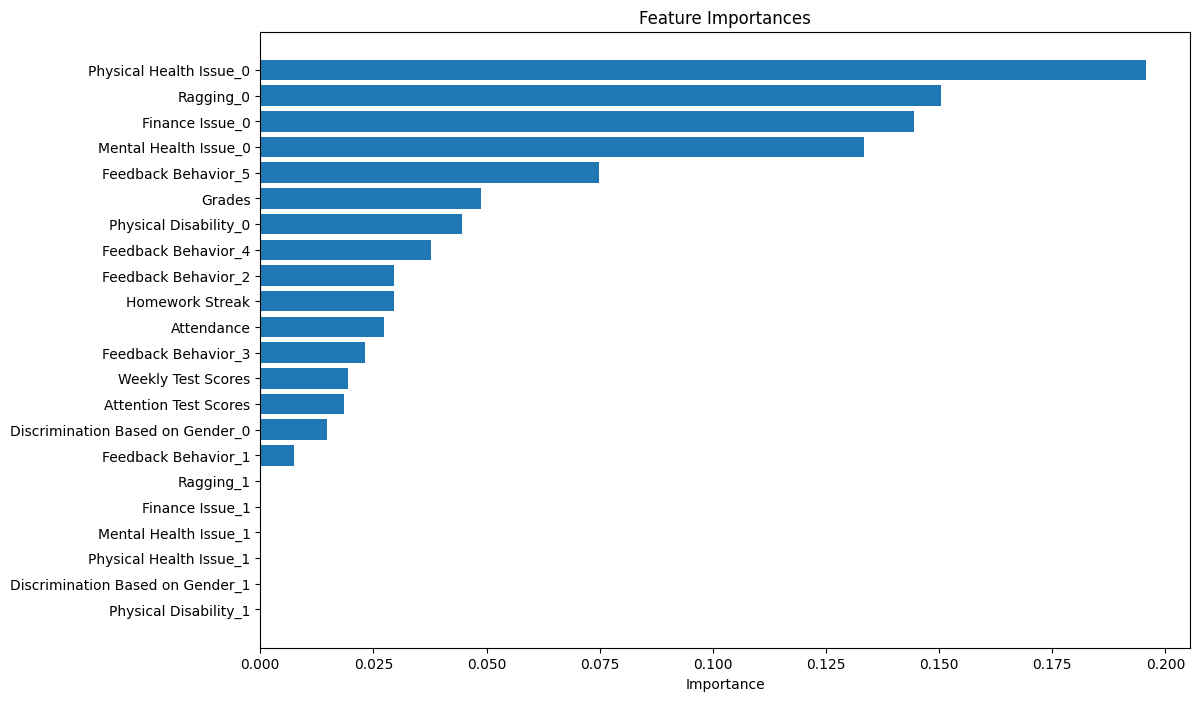

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Load the dataset
try:
    student_data = pd.read_csv('student_data_with_risk_types.csv')
except FileNotFoundError:
    raise FileNotFoundError("File 'student_data_with_risk_types.csv' not found. Please check the file path.")

# Define features and targets
features = student_data[['Attendance', 'Grades', 'Homework Streak', 'Feedback Behavior', 'Weekly Test Scores', 'Attention Test Scores',
                         'Ragging', 'Finance Issue', 'Mental Health Issue', 'Physical Health Issue',
                         'Discrimination Based on Gender', 'Physical Disability']]
target_dropout_risk = student_data['Risk Status']
target_risk_type = student_data['Risk Type']

# Convert Risk Type to numeric
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
target_risk_type_encoded = label_encoder.fit_transform(target_risk_type)

# Define preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['Attendance', 'Grades', 'Homework Streak',
                                    'Weekly Test Scores', 'Attention Test Scores']),
        ('cat', OneHotEncoder(), ['Feedback Behavior', 'Ragging', 'Finance Issue',
                                   'Mental Health Issue', 'Physical Health Issue',
                                   'Discrimination Based on Gender', 'Physical Disability'])
    ])

# Define the pipeline with MultiOutputClassifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MultiOutputClassifier(XGBClassifier(eval_metric='logloss')))
])

# Split the data into training and testing sets
X_train, X_test, y_train_dropout, y_test_dropout, y_train_risk_type, y_test_risk_type = train_test_split(
    features,
    target_dropout_risk,
    target_risk_type_encoded,
    test_size=0.2,
    random_state=42
)

# Train the model
pipeline.fit(X_train, pd.DataFrame({
    'Risk Status': y_train_dropout,
    'Risk Type': y_train_risk_type
}))

# Save the pipeline model
joblib.dump(pipeline, 'xgboost_multi_output_pipeline_model.pkl')

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Dropout Risk Model Accuracy: {accuracy_score(y_test_dropout, y_pred[:, 0]):.2f}")
print("Confusion Matrix for Dropout Risk:")
print(confusion_matrix(y_test_dropout, y_pred[:, 0]))
print("Classification Report for Dropout Risk:")
print(classification_report(y_test_dropout, y_pred[:, 0]))

print(f"Risk Type Model Accuracy: {accuracy_score(y_test_risk_type, y_pred[:, 1]):.2f}")
print("Confusion Matrix for Risk Type:")
print(confusion_matrix(y_test_risk_type, y_pred[:, 1]))
print("Classification Report for Risk Type:")
print(classification_report(y_test_risk_type, y_pred[:, 1]))

# Extract feature importances
xgb_model = pipeline.named_steps['classifier'].estimators_[0]
importances = xgb_model.feature_importances_

# Get feature names after one-hot encoding
onehot_feature_names = pipeline.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out()
feature_names = np.array(['Attendance', 'Grades', 'Homework Streak',
                          'Weekly Test Scores', 'Attention Test Scores'] + list(onehot_feature_names))
indices = np.argsort(importances)

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()


In [40]:
import joblib
import pandas as pd

# Load the trained model
pipeline = joblib.load('xgboost_multi_output_pipeline_model.pkl')

# Sample data for various conditions
# Each DataFrame below represents a different condition for testing

# Student with Academic Risk
academic_risk_data = pd.DataFrame({
    'Attendance': [60],  # Low attendance
    'Grades': [30],  # Low grades
    'Homework Streak': [0],  # No homework streak
    'Feedback Behavior': [3],  # Poor feedback
    'Weekly Test Scores': [40],  # Low test scores
    'Attention Test Scores': [45],  # Low attention test scores
    'Ragging': [0],  # No ragging
    'Finance Issue': [0],  # No financial issues
    'Mental Health Issue': [0],  # No mental health issues
    'Physical Health Issue': [0],  # No physical health issues
    'Discrimination Based on Gender': [0],  # No discrimination
    'Physical Disability': [0]  # No physical disability
})

# Student with Financial Risk
financial_risk_data = pd.DataFrame({
    'Attendance': [85],  # Normal attendance
    'Grades': [75],  # Normal grades
    'Homework Streak': [1],  # Positive streak
    'Feedback Behavior': [2],  # Fair feedback
    'Weekly Test Scores': [70],  # Normal test scores
    'Attention Test Scores': [65],  # Normal attention test scores
    'Ragging': [0],  # No ragging
    'Finance Issue': [1],  # Financial issue present
    'Mental Health Issue': [0],  # No mental health issues
    'Physical Health Issue': [0],  # No physical health issues
    'Discrimination Based on Gender': [0],  # No discrimination
    'Physical Disability': [0]  # No physical disability
})

# Student with Mental Health Risk
mental_health_risk_data = pd.DataFrame({
    'Attendance': [80],  # Normal attendance
    'Grades': [70],  # Normal grades
    'Homework Streak': [1],  # Positive streak
    'Feedback Behavior': [1],  # Excellent feedback
    'Weekly Test Scores': [75],  # Normal test scores
    'Attention Test Scores': [70],  # Normal attention test scores
    'Ragging': [0],  # No ragging
    'Finance Issue': [0],  # No financial issues
    'Mental Health Issue': [1],  # Mental health issue present
    'Physical Health Issue': [0],  # No physical health issues
    'Discrimination Based on Gender': [0],  # No discrimination
    'Physical Disability': [0]  # No physical disability
})

# Student with Bullying Risk
bullying_risk_data = pd.DataFrame({
    'Attendance': [85],  # Normal attendance
    'Grades': [75],  # Normal grades
    'Homework Streak': [1],  # Positive streak
    'Feedback Behavior': [2],  # Fair feedback
    'Weekly Test Scores': [70],  # Normal test scores
    'Attention Test Scores': [65],  # Normal attention test scores
    'Ragging': [1],  # Bullying present
    'Finance Issue': [0],  # No financial issues
    'Mental Health Issue': [0],  # No mental health issues
    'Physical Health Issue': [0],  # No physical health issues
    'Discrimination Based on Gender': [0],  # No discrimination
    'Physical Disability': [0]  # No physical disability
})

# Predict dropout risk and risk type for each condition
def predict_risk(new_data, label):
    prediction = pipeline.predict(new_data)
    dropout_risk = prediction[0][0]  # Dropout Risk Status
    risk_type = prediction[0][1]     # Risk Type
    print(f"Prediction for {label}:")
    print(f"Dropout Risk Status: {'High Risk' if dropout_risk == 1 else 'Low Risk'}")
    print(f"Risk Type: {risk_type}")

print("Student with Academic Risk:")
predict_risk(academic_risk_data, "Academic Risk")

print("\nStudent with Financial Risk:")
predict_risk(financial_risk_data, "Financial Risk")

print("\nStudent with Mental Health Risk:")
predict_risk(mental_health_risk_data, "Mental Health Risk")

print("\nStudent with Bullying Risk:")
predict_risk(bullying_risk_data, "Bullying Risk")


Student with Academic Risk:
Prediction for Academic Risk:
Dropout Risk Status: High Risk
Risk Type: 0

Student with Financial Risk:
Prediction for Financial Risk:
Dropout Risk Status: High Risk
Risk Type: 2

Student with Mental Health Risk:
Prediction for Mental Health Risk:
Dropout Risk Status: High Risk
Risk Type: 3

Student with Bullying Risk:
Prediction for Bullying Risk:
Dropout Risk Status: High Risk
Risk Type: 1


In [41]:
!pip install fastapi uvicorn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.4/71.4 kB 4.7 MB/s eta 0:00:00


In [43]:
from fastapi import FastAPI
from pydantic import BaseModel
import joblib
import pandas as pd

# Initialize FastAPI app
app = FastAPI()

# Load the combined model
model_combined = joblib.load('xgboost_multi_output_pipeline_model.pkl')  # Adjust filename as necessary

# Define the input data model
class StudentData(BaseModel):
    Attendance: float
    Grades: float
    Homework_Streak: int
    Feedback_Behavior: int
    Weekly_Test_Scores: float
    Attention_Test_Scores: float
    Ragging: int
    Finance_Issue: int
    Mental_Health_Issue: int
    Physical_Health_Issue: int
    Discrimination_Based_on_Gender: int
    Physical_Disability: int

@app.post("/predict")
def predict_risk(data: StudentData):
    # Convert input data into a DataFrame
    data_dict = data.dict()
    df = pd.DataFrame([data_dict])

    # Predict dropout risk and risk type using the combined model
    prediction = model_combined.predict(df)

    # Assuming the combined model outputs both dropout risk and risk type
    # Adjust this depending on how your combined model returns predictions
    dropout_risk = prediction[0]  # Modify according to actual output format
    risk_type_index = prediction[1]  # Modify according to actual output format

    # Interpret the prediction results
    if dropout_risk == 0:
        risk_status_str = "Low Risk"
    else:
        risk_status_str = "High Risk"

    # Define risk types (assuming an index-based system)
    risk_types = ["No Risk", "Academic Risk", "Financial Risk", "Mental Health Risk", "Bullying Risk"]
    risk_type = risk_types[risk_type_index] if dropout_risk == 1 else "No Risk"

    return {
        "Risk_Status": risk_status_str,
        "Risk_Type": risk_type
    }
